# Importing Libraries

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import math
import seaborn as sns
np.random.seed(0)


In [17]:
# Load and prepare the dataset
iris = load_iris()
X = iris.data
y = iris.target


In [18]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
# Convert labels to one-hot encoding
y_one_hot = np.zeros((y.size, y.max() + 1))
y_one_hot[np.arange(y.size), y] = 1


In [20]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

In [21]:
# Initialize parameters
def initialize_parameters(input_size, hidden_layer_size, output_size):
    w1 = np.random.rand(hidden_layer_size, input_size) * 0.01
    b1 = np.zeros((hidden_layer_size, 1))
    w2 = np.random.rand(output_size, hidden_layer_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return w1, b1, w2, b2

In [22]:
# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Sigmoid derivative function
def derivative_sigmoid(z):
    return z * (1 - z)

In [30]:
#forward Propogation
# Forward propagation
def forward(X, w1, b1, w2, b2):
    z1 = np.dot(w1, X.T) + b1
    A1 = sigmoid(z1)
    z2 = np.dot(w2, A1) + b2
    A2 = sigmoid(z2)
    return z1, A1, z2, A2



In [31]:
# Loss function (cross-entropy)
def loss_func(A2, y):
    m = y.shape[1]
    loss = -np.sum(y * np.log(A2)) / m
    return loss



In [32]:
#backward propogation
# Backpropagation
def back(X, y, w1, b1, w2, b2, A1, A2, z1, z2):
    m = X.shape[0]
    dz2 = A2 - y.T
    dw2 = np.dot(dz2, A1.T) / m
    db2 = np.sum(dz2, axis=1, keepdims=True) / m

    dA1 = np.dot(w2.T, dz2)
    dz1 = dA1 * derivative_sigmoid(A1)
    dw1 = np.dot(dz1, X) / m
    db1 = np.sum(dz1, axis=1, keepdims=True) / m

    return dw1, db1, dw2, db2



In [33]:
# Update parameters
def update_parameters(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate):
    w1 -= learning_rate * dw1
    b1 -= learning_rate * db1
    w2 -= learning_rate * dw2
    b2 -= learning_rate * db2
    return w1, b1, w2, b2


In [34]:
#train model
# Train the model
def train(X, y, hidden_layer_size, num_iterations, learning_rate):
    input_size = X.shape[1]
    output_size = y.shape[1]
    w1, b1, w2, b2 = initialize_parameters(input_size, hidden_layer_size, output_size)
    
    for i in range(num_iterations):
        z1, A1, z2, A2 = forward(X, w1, b1, w2, b2)
        loss = loss_func(A2, y.T)
        dw1, db1, dw2, db2 = back(X, y, w1, b1, w2, b2, A1, A2, z1, z2)
        w1, b1, w2, b2 = update_parameters(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate)
        if i % 1000 == 0:
            print(f"Iteration {i}: Loss = {loss}")
    return w1, b1, w2, b2



In [35]:
# Predict
def predict(X, w1, b1, w2, b2):
    _, _, _, A2 = forward(X, w1, b1, w2, b2)
    predictions = np.argmax(A2, axis=0)
    return predictions



In [53]:
# Train the model
w1, b1, w2, b2 = train(X_train, y_train, hidden_layer_size=10, num_iterations=10000, learning_rate=0.01)



Iteration 0: Loss = 0.6819903843647523
Iteration 1000: Loss = 1.0977727280953322
Iteration 2000: Loss = 1.057391431983117
Iteration 3000: Loss = 0.7127072189690309
Iteration 4000: Loss = 0.5405645447112638
Iteration 5000: Loss = 0.48879650064237645
Iteration 6000: Loss = 0.45956220414079435
Iteration 7000: Loss = 0.4342439750464559
Iteration 8000: Loss = 0.4073716360990114
Iteration 9000: Loss = 0.3777052196977418


In [62]:
# Make predictions
train_predictions = predict(X_train, w1, b1, w2, b2)
test_predictions = predict(X_test, w1, b1, w2, b2)



In [63]:
# Calculate accuracy
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), train_predictions)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), test_predictions)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 0.95
Test Accuracy: 0.9333333333333333


# MLP

In [56]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(random_state = 42,hidden_layer_sizes = (10,),max_iter = 10000,learning_rate_init=0.01)
mlp_classifier.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=10000,
              random_state=42)

In [57]:
mlp_pred = mlp_classifier.predict(X_test)
mlp_pred

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [58]:
# Predictions
mlp_train_predictions = mlp_classifier.predict(X_train)
mlp_test_predictions = mlp_classifier.predict(X_test)

In [59]:
#MLP train accuracy 
mlp_train_accuracy = accuracy_score(y_train,mlp_train_predictions)
print("mlp_train_accuracy :",mlp_train_accuracy)

mlp_train_accuracy : 0.9833333333333333


In [60]:
# MLP test Accuracy
mlp_test_accuracy = accuracy_score(y_test,mlp_test_predictions)
print("mlp_test_accuracy :",mlp_test_accuracy)

mlp_test_accuracy : 1.0


# Compairing train and test accuracy

In [68]:
# Importing Pandas to create DataFrame
import pandas as pd

# Creating Empty DataFrame and Storing it in variable df
df = pd.DataFrame()

# Printing Empty DataFrame
print(df)


Empty DataFrame
Columns: []
Index: []


In [72]:
# initialize list of lists
data = [['NN', 0.95,0.9333333333333333], ['MLP', 0.9833333333333333,1.0]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Model', 'Train_accuracy',"Test_accuracy"])

# print dataframe.
print(df)


  Model  Train_accuracy  Test_accuracy
0    NN        0.950000       0.933333
1   MLP        0.983333       1.000000


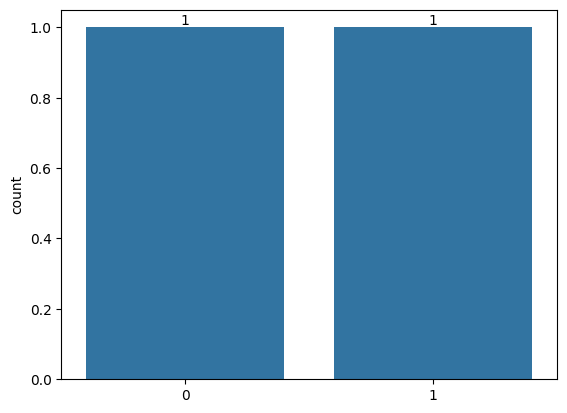

In [87]:
#visualizing Train Accuracy

import seaborn as sns
ax = sns.countplot(data = df["Train_accuracy"])
for bars in ax.containers:
    ax.bar_label(bars)
